In [96]:
import gc
import numpy as np
import pandas as pd
import keras.backend as K
from rnn_mimic import return_loaded_model
from seaborn import heatmap
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis

# plot part.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [97]:
target = 'SEPSIS'#'VANCOMYCIN'

In [98]:
## PICKLE LOADS

X_TRAIN_MI = pickle.load(open('./pickled_objects/X_TRAIN_MI.txt', 'rb'))
X_TRAIN_SEPSIS = pickle.load(open('./pickled_objects/X_TRAIN_SEPSIS.txt', 'rb'))
X_TRAIN_VANCOMYCIN = pickle.load(open('./pickled_objects/X_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_TRAIN_MI = pickle.load(open('./pickled_objects/Y_TRAIN_MI.txt', 'rb'))
Y_TRAIN_SEPSIS = pickle.load(open('./pickled_objects/Y_TRAIN_SEPSIS.txt', 'rb'))
Y_TRAIN_VANCOMYCIN = pickle.load(open('./pickled_objects/Y_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_VAL_MI = pickle.load(open('./pickled_objects/Y_VAL_MI.txt', 'rb'))
Y_VAL_SEPSIS = pickle.load(open('./pickled_objects/Y_VAL_SEPSIS.txt', 'rb'))
Y_VAL_VANCOMYCIN = pickle.load(open('./pickled_objects/Y_VAL_VANCOMYCIN.txt', 'rb'))

X_VAL_MI = pickle.load(open('./pickled_objects/X_VAL_MI.txt', 'rb'))
X_VAL_SEPSIS = pickle.load(open('./pickled_objects/X_VAL_SEPSIS.txt', 'rb'))
X_VAL_VANCOMYCIN = pickle.load(open('./pickled_objects/X_VAL_VANCOMYCIN.txt', 'rb'))

Y_TEST_MI = pickle.load(open('./pickled_objects/Y_TEST_MI.txt', 'rb'))
Y_TEST_SEPSIS = pickle.load(open('./pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
Y_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))

X_TEST_MI = pickle.load(open('./pickled_objects/X_TEST_MI.txt', 'rb'))
X_TEST_SEPSIS = pickle.load(open('./pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
X_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))

y_boolmat_test_MI = pickle.load(open('./pickled_objects/y_boolmat_test_MI.txt', 'rb'))
y_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
y_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))

x_boolmat_test_MI = pickle.load(open('./pickled_objects/x_boolmat_test_MI.txt', 'rb'))
x_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
x_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))

no_features_cols_MI = pickle.load(open('./pickled_objects/no_feature_cols_MI.txt', 'rb'))
no_features_cols_SEPSIS = pickle.load(open('./pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
no_features_cols_VANCOMYCIN = pickle.load(open('./pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))

features_MI = pickle.load(open('./pickled_objects/features_MI.txt', 'rb'))
features_SEPSIS = pickle.load(open('./pickled_objects/features_SEPSIS.txt', 'rb'))
features_VANCOMYCIN = pickle.load(open('./pickled_objects/features_VANCOMYCIN.txt', 'rb'))

if target == 'MI':
    my_cmap = ListedColormap(sns.color_palette("Reds", 150))
    color_list = sns.color_palette("Reds", 14)
    color_list_reduced = sns.color_palette("Reds", 7)
    X_TRAIN = X_TRAIN_MI
    X_VAL = X_VAL_MI
    Y_TRAIN = Y_TRAIN_MI
    Y_VAL = Y_VAL_MI
    Y_TEST = Y_TEST_MI
    X_TEST = X_TEST_MI
    y_boolmat_test = y_boolmat_test_MI
    x_boolmat_test = x_boolmat_test_MI
    features = features_MI
    
elif target == 'SEPSIS':
    my_cmap = sns.cubehelix_palette(14, start=2, rot=0, dark=0.25, light=.95, as_cmap=True)
    color_list = sns.cubehelix_palette(14, start=2, rot=0, dark=0.15, light=.8)
    color_list_reduced = sns.cubehelix_palette(7, start=2, rot=0, dark=0.15, light=.8)
    X_TRAIN = X_TRAIN_SEPSIS
    X_VAL = X_VAL_SEPSIS
    Y_TRAIN = Y_TRAIN_SEPSIS
    Y_VAL = Y_VAL_SEPSIS
    Y_TEST = Y_TEST_SEPSIS
    X_TEST = X_TEST_SEPSIS
    y_boolmat_test = y_boolmat_test_SEPSIS
    x_boolmat_test = x_boolmat_test_SEPSIS
    features = features_SEPSIS
    
elif target == 'VANCOMYCIN':
    my_cmap= sns.cubehelix_palette(14, as_cmap=True)
    color_list = sns.cubehelix_palette(14)
    color_list_reduced = sns.cubehelix_palette(7)
    X_TRAIN = X_TRAIN_VANCOMYCIN
    X_VAL = X_VAL_VANCOMYCIN
    Y_TRAIN = Y_TRAIN_VANCOMYCIN
    Y_VAL = Y_VAL_VANCOMYCIN
    Y_TEST = Y_TEST_VANCOMYCIN
    X_TEST = X_TEST_VANCOMYCIN
    y_boolmat_test = y_boolmat_test_VANCOMYCIN
    x_boolmat_test = x_boolmat_test_VANCOMYCIN
    features = features_VANCOMYCIN
    
# Y_TRAIN[Y_TRAIN == -1] = np.nan
# Y_VAL[Y_VAL == -1] = np.nan
# Y_TEST[Y_TEST == -1] = np.nan
Y_TOTAL = np.concatenate([Y_TRAIN, Y_VAL, Y_TEST], axis=0)

In [99]:
Y_MI = np.concatenate([Y_TRAIN_MI, Y_VAL_MI], axis=0)
Y_SEPSIS = np.concatenate([Y_TRAIN_SEPSIS, Y_VAL_SEPSIS], axis=0)
Y_VANCOMYCIN = np.concatenate([Y_TRAIN_VANCOMYCIN, Y_VAL_VANCOMYCIN], axis=0)

print(np.sum(np.sum(Y_MI.squeeze(), axis=1) > 0))
print(np.sum(np.sum(Y_SEPSIS.squeeze(), axis=1) > 0))
print(np.sum(np.sum(Y_VANCOMYCIN.squeeze(), axis=1) > 0))

1721
20703
16529


In [100]:
print(no_features_cols_MI)
print(no_features_cols_SEPSIS)
print(no_features_cols_VANCOMYCIN)

print(X_TRAIN_MI.shape)
print(X_TRAIN_SEPSIS.shape)
print(X_TRAIN_VANCOMYCIN.shape)

224
228
227
(1516, 14, 224)
(36272, 14, 228)
(28908, 14, 227)


In [101]:
import pdb

In [102]:
''' this function is adapted from Keras documentation '''

# def get_activations(model, inputs, print_shape_only=False, layer_name=None, verbose=False):
  
#     """
#     Get activations from a model
#     Args:
#         model: a keras model
#         inputs: the inputs for the model
#         print_shape_only: whether to print the shape of the layer or the whole activation layer
#         layer_name: name of specific layer to return
#         verbose: whether to show all outputs
#     Returns:
#         activations: list, list of activations
#     """
#     activations = []
#     inp = model.input
    
#     if layer_name is None:
#         outputs = [layer.output for layer in model.layers]
#     else:
#         outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
#     # pdb.set_trace()
    
#     funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

#     layer_outputs = [func([inputs, 1.])[0] for func in funcs]
#     for layer_activations in layer_outputs:
#         activations.append(layer_activations)
#         if verbose:
#             print('----- activations -----')
#             if print_shape_only:
#                 print(layer_activations.shape)
#             else:
#                 print(layer_activations)
#     return activations

def get_activations(model, inputs, print_shape_only=False, layer_name=None, verbose=False):
  
    """
    Get activations from a model
    Args:
        model: a keras model
        inputs: the inputs for the model
        print_shape_only: whether to print the shape of the layer or the whole activation layer
        layer_name: name of specific layer to return
        verbose: whether to show all outputs
    Returns:
        activations: list, list of activations
    """
    activations = []
    inp = model.input
    
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    # pdb.set_trace()
    
    funcs = [K.function([inp], [out]) for out in outputs]  # evaluation functions

    layer_outputs = [func([inputs])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if verbose:
            print('----- activations -----')
            if print_shape_only:
                print(layer_activations.shape)
            else:
                print(layer_activations)
    return activations

def normalize_activations(activations_matrix):
    means = np.nanmean(activations_matrix, axis=0)
    stds = np.nanstd(activations_matrix, axis=0)
    return (activations_matrix - means) / stds

In [103]:
TIME_STEPS = X_VAL.shape[1] #number of time_steps

In [104]:
if target == 'MI':
    # m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_attention")
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
    m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
elif target == 'SEPSIS':
    # m = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_attention")
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
    m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
elif target == 'VANCOMYCIN':
    # m = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_attention")
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")
    m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")

The total kurtosis is 1.1442172052288564 with 63.92532795156408 % of events occuring between days 0 and 2


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\App

The train kurtosis is 1.1373755992568721 with 64.88661302121434 % of events occuring between days 0 and 2


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:59: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\App

The test kurtosis is 1.286779519875095 with 63.9618138424821 % of events occuring between days 0 and 2


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:94: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\1269223961.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
C:\Users\lengh\AppDa

<Figure size 640x480 with 0 Axes>

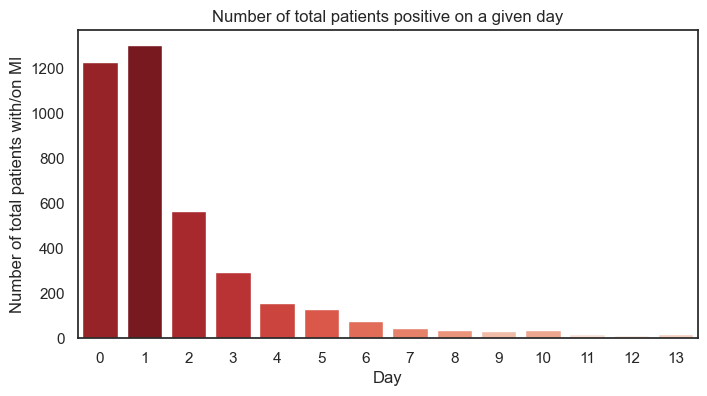

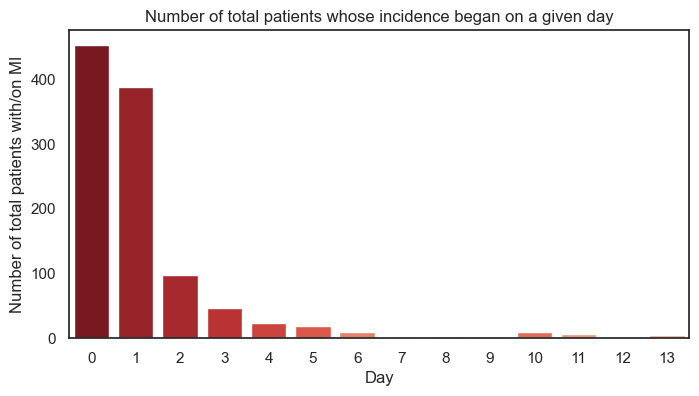

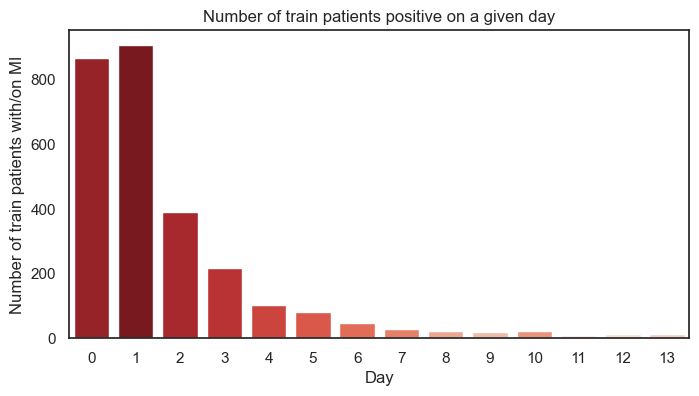

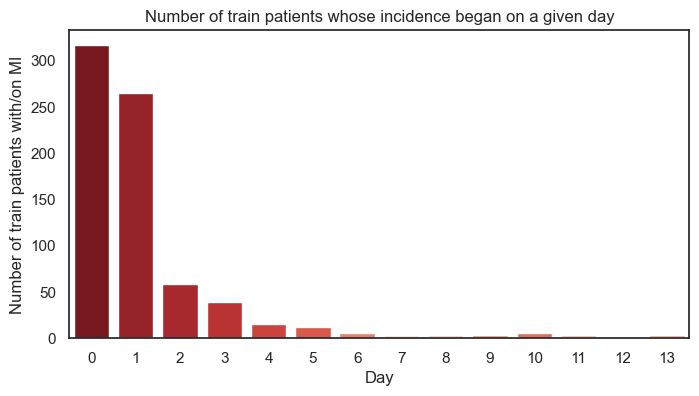

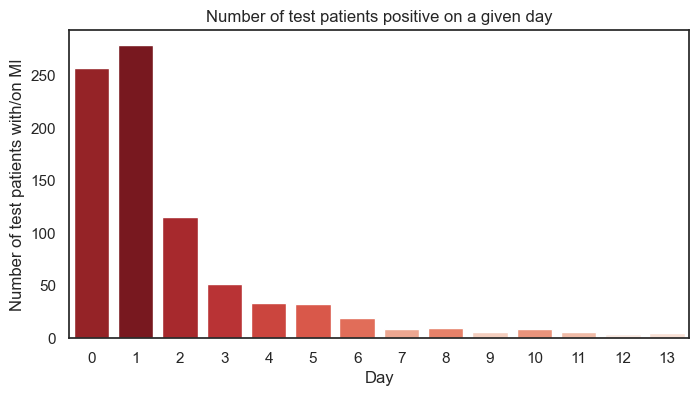

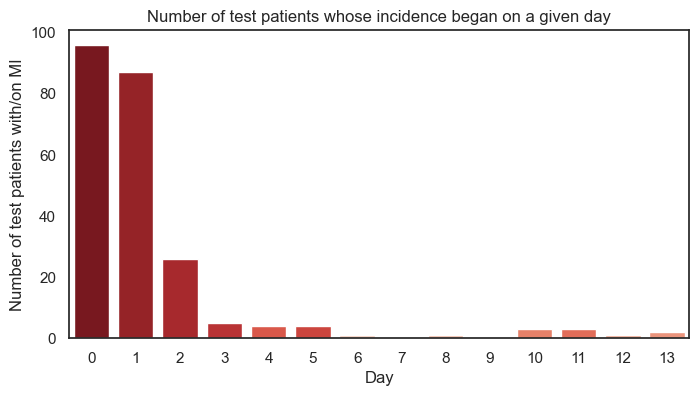

In [105]:
############################
## SUPPLEMENTARY FIGURE 1 ##
############################

sns.set(style="white")
sns.despine(left=True, bottom=True)
    
## TOTAL

### When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients positive on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_total = np.nansum(Y_TOTAL, axis=0).squeeze()
print("The total kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_total), 
                                            100*int(np.sum(y_vector_total[0:2]))/np.sum(y_vector_total)))
color_rank = np.argsort(np.argsort(y_vector_total))
sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig('./figures/{0}_Total_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')

# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients whose incidence began on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TOTAL = Y_TOTAL[np.nansum(Y_TOTAL.squeeze(), axis=1) == 1]
(days_total, value_counts_total) = np.unique(np.nanargmax(POS_Y_TOTAL, axis=1), return_counts=True)
day_value_dict_total = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_total)):
    day_value_dict_total[days_total[i]] = value_counts_total[i]
y_vector_total_pos = list(day_value_dict_total.values())
color_rank = np.argsort(np.argsort(y_vector_total_pos))
sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
#plt.show()

plt.savefig('./figures/{0}_Total_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

## TRAIN

## When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients positive on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_train = np.nansum(Y_TRAIN, axis=0).squeeze()
print("The train kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_train), 
                                            100*int(np.sum(y_vector_train[0:2]))/np.sum(y_vector_train)))
color_rank = np.argsort(np.argsort(y_vector_train))
sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig('./figures/{0}_Train_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')


# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients whose incidence began on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TRAIN = Y_TRAIN[np.nansum(Y_TRAIN.squeeze(), axis=1) == 1]
(days_train_pos, value_counts_train_pos) = np.unique(np.nanargmax(POS_Y_TRAIN, axis=1), return_counts=True)
day_value_dict_train_pos = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_train_pos)):
    day_value_dict_train_pos[days_train_pos[i]] = value_counts_train_pos[i]
y_vector_train_pos = list(day_value_dict_train_pos.values())
color_rank = np.argsort(np.argsort(y_vector_train_pos))
sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig('./figures/{0}_Train_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

## TEST

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients positive on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_test = np.nansum(Y_TEST, axis=0).squeeze()
print("The test kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_test), 
                                          100*int(np.sum(y_vector_test[0:2]))/np.sum(y_vector_test)))
color_rank = np.argsort(np.argsort(y_vector_test))
sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig('./figures/{0}_Test_Patients_Positive_Supplemental_Figure_1.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

# first incident - nmber of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients whose incidence began on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TEST = Y_TEST[np.nansum(Y_TEST.squeeze(), axis=1) == 1]
(days, value_counts) = np.unique(np.nanargmax(POS_Y_TEST, axis=1), return_counts=True)
day_value_dict = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days)):
    day_value_dict[days[i]] = value_counts[i]
y_vector_test_pos = list(day_value_dict.values())
color_rank = np.argsort(np.argsort(y_vector_test_pos))
sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig('./figures/{0}_Test_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

In [106]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent = m_80.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent = m_60.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent = m_40.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent = m_20.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent = m_10.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent = m_5.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models that have been trained with various fractions of training data

342/342 [==============================] - 6s 11ms/step


In [107]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

(fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_80, tpr_80, thresholds_80) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test])
(fpr_60, tpr_60, thresholds_60) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test])
(fpr_40, tpr_40, thresholds_40) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test])
(fpr_20, tpr_20, thresholds_20) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test])
(fpr_10, tpr_10, thresholds_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test])
(fpr_5, tpr_5, thresholds_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test])

fpr_tprs = [(fpr_100, tpr_100), (fpr_80, tpr_80), (fpr_60, tpr_60),        
            (fpr_40, tpr_40), (fpr_20, tpr_20), (fpr_10, tpr_10), (fpr_5, tpr_5)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8121901121378048
0.8093450225208393
0.817579780163282
0.8219691168128015
0.7876111911396876
0.7857606146244263
0.7402610989094137
PPV for full model is 0.0279027902790279
Sensitivity for full model is 0.55
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     89833
         1.0       0.03      0.55      0.05       838

    accuracy                           0.82     90671
   macro avg       0.51      0.69      0.48     90671
weighted avg       0.99      0.82      0.89     90671



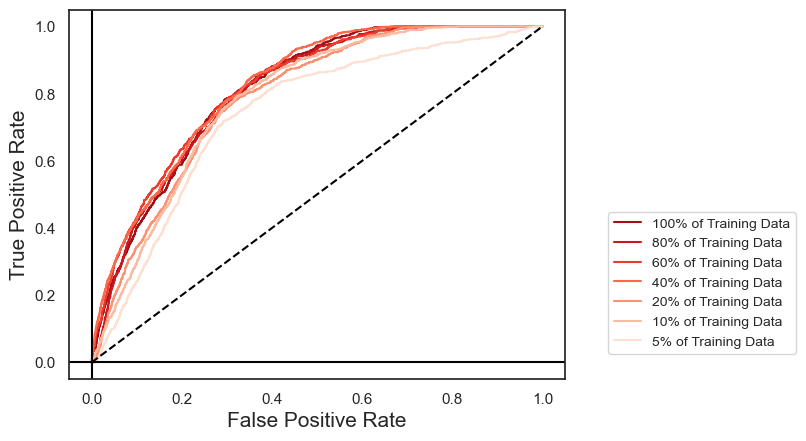

In [108]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig('./figures/{0}_less_data_roc_curves_Supplemental_Figure_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test]))

## 100% Training Data ##
TN, FP, FN, TP = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])).ravel()
PPV = TP/(TP+FP)
print("PPV for full model is {0}".format(PPV))
CR = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print("Sensitivity for full model is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])))

In [109]:
# GET ACTIVATIONS MATRIX ; OUTPUT IS (BATCH_SIZE, TIME_STEPS, FEATURES)

activations = get_activations(m, X_TEST, print_shape_only=True, layer_name='attention_vec')[0]
activations[x_boolmat_test] = np.nan

# AVERAGE THE ATTENTION MATRIX OVER FEATURES ; OUTPUT IS BATCH_SIZE, TIME_STEPS
attention_matrix = np.nanmean(activations, axis=2).squeeze()

# AVERAGE ATTENTION VECTOR ACROSS SAMPLES ; OUTPUT IS 1D TIME_STEPS
attention_vector_final = np.nanmean(attention_matrix, axis=0)

# This allows us to rank color intensity by activation. We sort the intensities, then argsort the indices ##
color_order = np.argsort(attention_vector_final, axis=0)
color_order_order = np.argsort(color_order)

C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3684138110.py:7: RuntimeWarning: Mean of empty slice
  attention_matrix = np.nanmean(activations, axis=2).squeeze()


In [110]:
X_TEST

array([[[ 0.49636642,  0.83547424,  0.80531104, ..., -0.13687463,
         -0.30881676, -0.2589223 ],
        [-0.13408289,  0.83547424,  1.35820097, ..., -0.13687463,
         -0.30881676, -0.2589223 ],
        [-0.04401871,  0.83547424,  1.35169638, ..., -0.13687463,
         -0.30881676, -0.2589223 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.49636642,  0.83547424,  0.62318259, ..., -0.13687463,
         -0.30881676, -0.2589223 ],
        [-0.88461779, -1.19522476, -1.18509272, ..., -0.13687463,
         -0.30881676, -0.2589223 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [111]:
attention_vector_final

array([0.07875681, 0.08420099, 0.15383014, 0.08625516, 0.07477231,
       0.06739271, 0.06317402, 0.04714694, 0.06023507, 0.04860593,
       0.05216377, 0.04038373, 0.06529521, 0.04568213], dtype=float32)

In [112]:
''' Due to the way features are selectd from the EMR and the fact potassium can be a 
delivered medication or a lab value, special care was taken to ensure proper representation on heatmaps '''

if 'digoxin(?!.*fab)' in features:
    indexy = features.index('digoxin(?!.*fab)')
    features[indexy] = 'digoxin'
    
if 'potassium_y' in features:
    indexy = features.index('potassium_y')
    features[indexy] = 'potassium_med'
    
if 'potassium_x' in features:
    indexy = features.index('potassium_x')
    features[indexy] = 'potassium'
    
if 'cipfloxacin' in features:
    indexy = features.index('cipfloxacin')
    features[indexy] = 'ciprofloxacin'

features = [feature.lower() for feature in features]

In [113]:
## FEATURES BY CATEGORY ##

cbc_diff_features = ['RBCs', 'WBCs', 'platelets', 'hemoglobin', 'hemocrit', 
                              'atypical lymphocytes', 'bands', 'basophils', 'eosinophils', 'neutrophils',
                              'lymphocytes', 'monocytes', 'polymorphonuclear leukocytes']
                      
vital_features = ['temperature (F)', 'heart rate', 'respiratory rate', 'systolic', 'diastolic',
                  'pulse oximetry']

lab_features = ['troponin', 'HDL', 'LDL', 'BUN', 'INR', 'PTT', 'PT', 'triglycerides', 'creatinine',
                  'glucose', 'sodium', 'potassium', 'chloride', 'bicarbonate',
                  'blood culture', 'urine culture', 'surface culture', 'sputum' + 
                  ' culture', 'wound culture', 'Inspired O2 Fraction', 'central venous pressure', 
                  'PEEP Set', 'tidal volume', 'anion gap']
                  
demographic_features = ['age', 'm', 'black', 'daily weight', 'tobacco', 'diabetes', 'history of CV events']

med_features = ['epoetin', 'warfarin', 'heparin', 'enoxaparin', 'fondaparinux',
                                      'asprin', 'ketorolac', 'acetominophen', 
                                      'insulin', 'glucagon', 
                                      'potassium_med', 'calcium gluconate', 
                                      'fentanyl', 'magensium sulfate', 
                                      'D5W', 'dextrose', 
                                      'ranitidine', 'ondansetron', 'pantoprazole', 'metoclopramide', 
                                      'lisinopril', 'captopril', 'statin',  
                                      'hydralazine', 'diltiazem', 
                                      'carvedilol', 'metoprolol', 'labetalol', 'atenolol',
                                      'amiodarone', 'digoxin',
                                      'clopidogrel', 'nitroprusside', 'nitroglycerin',
                                      'vasopressin', 'hydrochlorothiazide', 'furosemide', 
                                      'atropine', 'neostigmine',
                                      'levothyroxine',
                                      'oxycodone', 'hydromorphone', 'fentanyl citrate', 
                                      'tacrolimus', 'prednisone', 
                                      'phenylephrine', 'norepinephrine',
                                      'haloperidol', 'phenytoin', 'trazodone', 'levetiracetam',
                                      'diazepam', 'clonazepam',
                                      'propofol', 'zolpidem', 'midazolam', 
                                      'albuterol', 'ipratropium', 
                                      'diphenhydramine',  
                                      '0.9% Sodium Chloride',
                                      'phytonadione', 
                                      'metronidazole', 
                                      'cefazolin', 'cefepime', 'vancomycin', 'levofloxacin',
                                      'ciprofloxacin', 'fluconazole', 
                                      'meropenem', 'ceftriaxone', 'piperacillin',
                                      'ampicillin-sulbactam', 'nafcillin', 'oxacillin',
                                      'amoxicillin', 'penicillin', 'SMX-TMP']

cbc_diff_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in cbc_diff_features]
vital_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in vital_features]
lab_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in lab_features]
demographic_features = [i.lower() for i in demographic_features]
med_features = [i.lower() for i in med_features]

cbc_diff_feature_array = np.array(cbc_diff_features).flatten()
vital_features_array = np.array(vital_features).flatten()
lab_features_array = np.array(lab_features).flatten()
demographic_feature_array = np.array(demographic_features).flatten()
med_features_array = np.array(med_features).flatten()

features_built = np.hstack([cbc_diff_feature_array,vital_features_array,
                            lab_features_array,demographic_feature_array,med_features_array])

features_built_reduced = [i for i in features_built if i in features]

In [114]:
## Identifies the index in the features list in the desired order ##
arranged_indices = [features.index(i) for i in features_built_reduced]

In [115]:
## This is a sanity check to ensure that features_built_reduced has the same number of elements as our target ##

print(len(features_SEPSIS))
print(len(features_MI))
print(len(features_VANCOMYCIN))
print('\n')
print(len(features_built))
print(len(features_built_reduced))

228
224
227


256
222


In [116]:
##############
## FIGURE 1 ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

342/342 [==============================] - 4s 11ms/step


In [117]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test]))   
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test]))

0.8121901121378048
0.8131398524235915
0.8124455516463895
0.8141998410362458
0.812777199920712
0.812226894789422
0.8131721850252658
0.8067571590743015
0.806300690220015
0.8039092001714027
0.7628833462313934
0.7760861130625649
0.7329934832405938
0.687962889877842


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


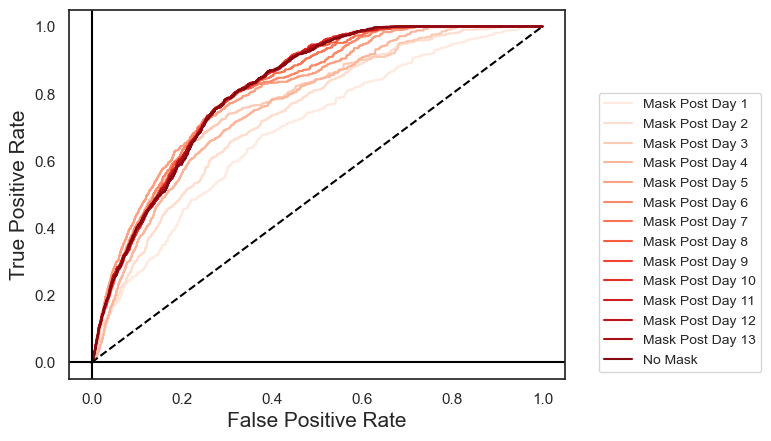

In [118]:
##############
## FIGURE 1 ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)
        
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig('./figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

In [119]:
##############################
## FIGURE 2 LAG EXPERIMENTS ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation 

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]], 
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]], 
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]], 
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]], 
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]], 
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]], 
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]], 
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]], 
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]], 
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)
                                      
### all the first day soft every person, all the second days, third days, in a 1D vector
                                      
Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############                                     
                                      
Y_PRED_LAG_1 = np.concatenate([Y_PRED_mask_1[:,1,::][~y_boolmat_test[:,1,::]], 
                             Y_PRED_mask_2[:,2,::][~y_boolmat_test[:,2,::]], 
                             Y_PRED_mask_3[:,3,::][~y_boolmat_test[:,3,::]], 
                             Y_PRED_mask_4[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5[:,5,::][~y_boolmat_test[:,5,::]], 
                             Y_PRED_mask_6[:,6,::][~y_boolmat_test[:,6,::]], 
                             Y_PRED_mask_7[:,7,::][~y_boolmat_test[:,7,::]], 
                             Y_PRED_mask_8[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_10[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_11[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_12[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2 = np.concatenate([Y_PRED_mask_1[:,2,::][~y_boolmat_test[:,2,::]], 
                             Y_PRED_mask_2[:,3,::][~y_boolmat_test[:,3,::]], 
                             Y_PRED_mask_3[:,4,::][~y_boolmat_test[:,4,::]], 
                             Y_PRED_mask_4[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5[:,6,::][~y_boolmat_test[:,6,::]], 
                             Y_PRED_mask_6[:,7,::][~y_boolmat_test[:,7,::]], 
                             Y_PRED_mask_7[:,8,::][~y_boolmat_test[:,8,::]], 
                             Y_PRED_mask_8[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_10[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_11[:,12,::][~y_boolmat_test[:,12,::]], 
                             Y_PRED_mask_12[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3 = np.concatenate([Y_PRED_mask_1[:,3,::][~y_boolmat_test[:,3,::]], 
                             Y_PRED_mask_2[:,4,::][~y_boolmat_test[:,4,::]], 
                             Y_PRED_mask_3[:,5,::][~y_boolmat_test[:,5,::]], 
                             Y_PRED_mask_4[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5[:,7,::][~y_boolmat_test[:,7,::]], 
                             Y_PRED_mask_6[:,8,::][~y_boolmat_test[:,8,::]], 
                             Y_PRED_mask_7[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_8[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_10[:,12,::][~y_boolmat_test[:,12,::]], 
                             Y_PRED_mask_11[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4 = np.concatenate([Y_PRED_mask_1[:,4,::][~y_boolmat_test[:,4,:]], 
                             Y_PRED_mask_2[:,5,::][~y_boolmat_test[:,5,:]], 
                             Y_PRED_mask_3[:,6,::][~y_boolmat_test[:,6,::]], 
                             Y_PRED_mask_4[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5[:,8,::][~y_boolmat_test[:,8,::]], 
                             Y_PRED_mask_6[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_7[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_8[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,12,::][~y_boolmat_test[:,12,::]], 
                             Y_PRED_mask_10[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]], 
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]], 
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]], 
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]], 
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]], 
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]], 
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6 = np.concatenate([Y_PRED_mask_1[:,6,::][~y_boolmat_test[:,6,:]], 
                             Y_PRED_mask_2[:,7,::][~y_boolmat_test[:,7,:]], 
                             Y_PRED_mask_3[:,8,::][~y_boolmat_test[:,8,::]], 
                             Y_PRED_mask_4[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5[:,10,::][~y_boolmat_test[:,10,::]], 
                             Y_PRED_mask_6[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_7[:,12,::][~y_boolmat_test[:,12,::]], 
                             Y_PRED_mask_8[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7 = np.concatenate([Y_PRED_mask_1[:,7,::][~y_boolmat_test[:,7,:]], 
                             Y_PRED_mask_2[:,8,::][~y_boolmat_test[:,8,:]], 
                             Y_PRED_mask_3[:,9,::][~y_boolmat_test[:,9,::]], 
                             Y_PRED_mask_4[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5[:,11,::][~y_boolmat_test[:,11,::]], 
                             Y_PRED_mask_6[:,12,::][~y_boolmat_test[:,12,::]], 
                             Y_PRED_mask_7[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)
                                      
## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7))  

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

## 100% Training Data with 1 day lag ##
TN, FP, FN, TP = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)).ravel()
PPV = TP/(TP+FP)
print("PPV for full model w/ 1 day lag is {0}".format(PPV))
CR = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

print("Sensitivity for full model w/ 1 day lag is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)))

0.8149727693499272
0.749165263924162
0.6921513690284069
0.6824421914752885
0.671313607513977
0.6211155347084046
0.5798920142558018
PPV for full model w/ 1 day lag is 0.021430856168034973
Sensitivity for full model w/ 1 day lag is 0.69
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     79171
         1.0       0.02      0.69      0.04       581

    accuracy                           0.77     79752
   macro avg       0.51      0.73      0.45     79752
weighted avg       0.99      0.77      0.86     79752



In [120]:
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1)
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2)
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3)
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4)
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5)
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6)
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7)

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


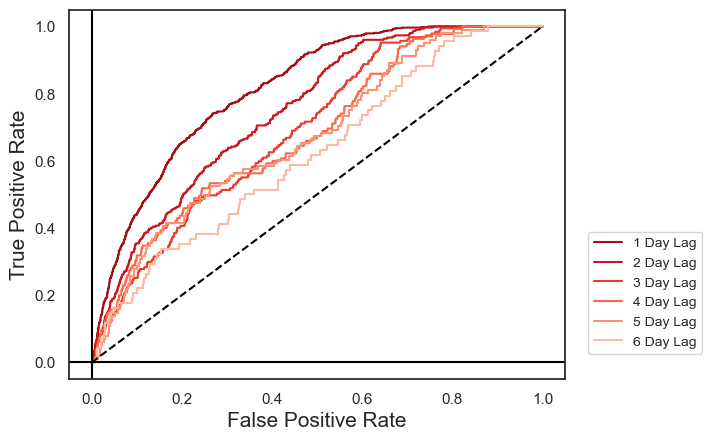

In [121]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig('./figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:11: RuntimeWarning: Mean of empty slice
  heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:27: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:30: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:30: UserWarning: Numpy array is no

There is a 0.06912874864032825 % change between day 0 and 1


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:43: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:45: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\2484350824.py:45: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list

['levetiracetam' 'inspired o2 fraction_max' 'asprin' 'levothyroxine'
 'hemocrit_max' 'tacrolimus' 'diastolic_std' 'warfarin' 'ptt_std'
 'nafcillin' 'clonazepam' 'warfarin' 'eosinophils' 'diabetes']


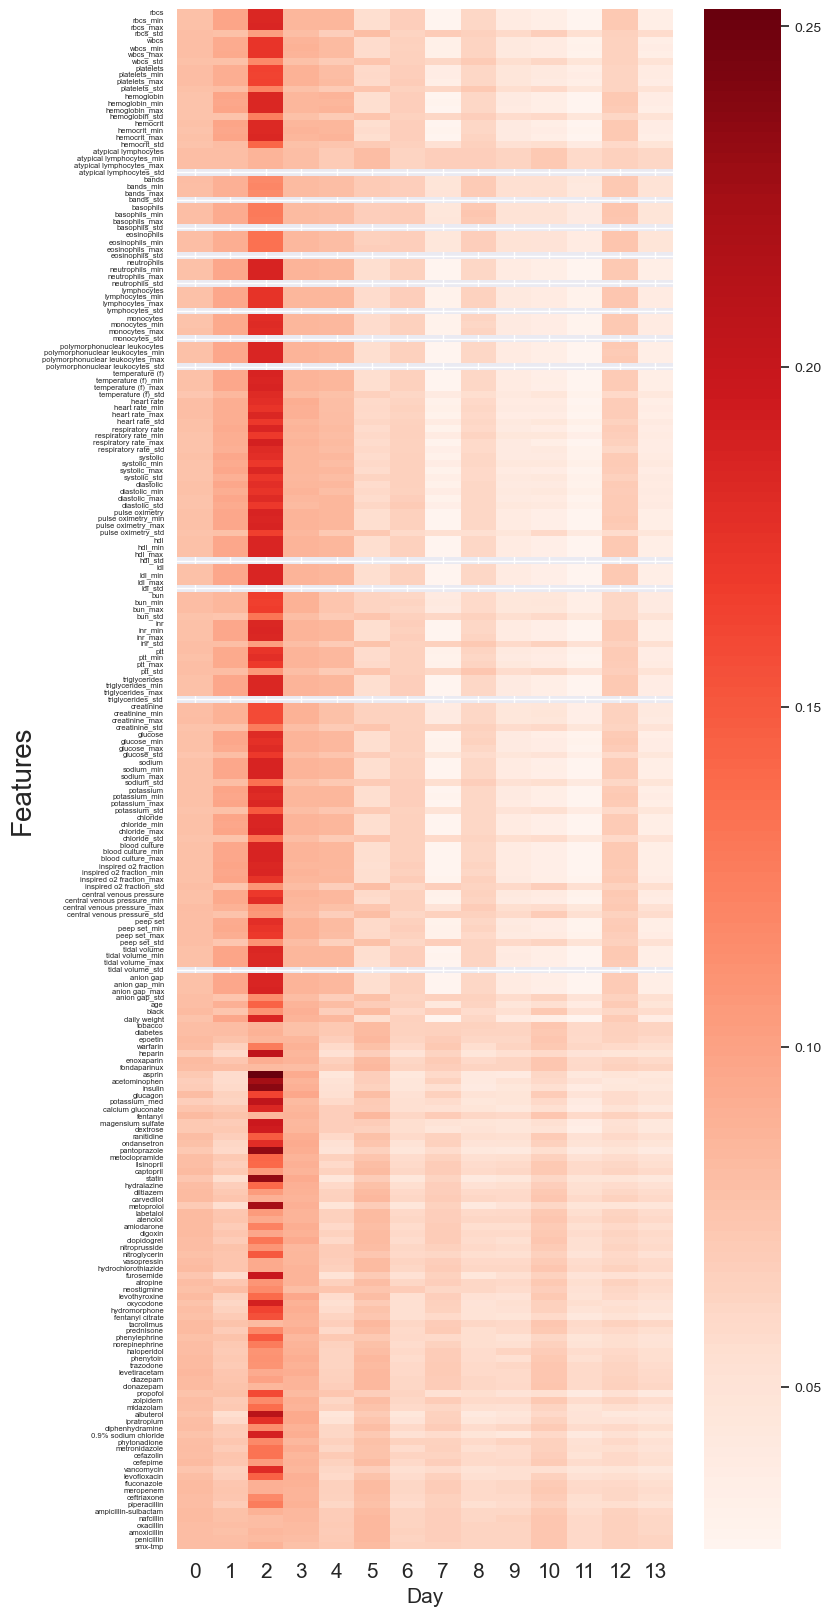

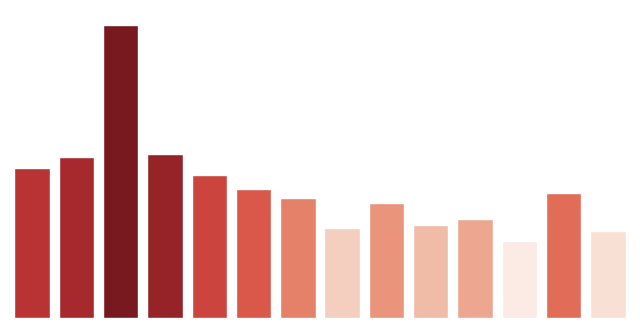

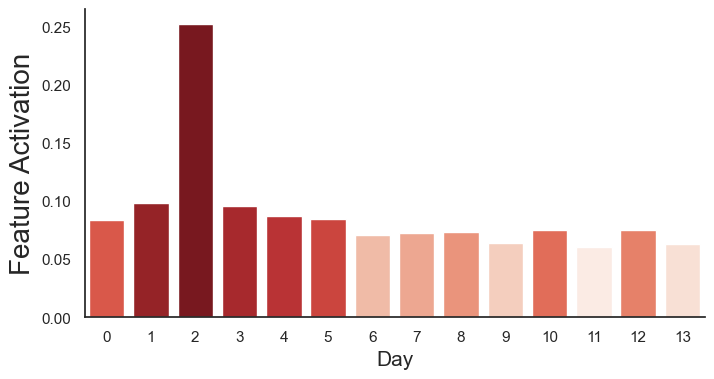

In [122]:
##############
## FIGURE 3 ##
##############

## GET HEATMAPS FOR ALL INCIDENTS AVERAGE ##

plt.figure(figsize = (8,20))

sns.set(font_scale = 0.5)

heatmap(np.nanmean(activations,axis=0).T[arranged_indices], 
        square=False, 
        yticklabels=np.array(features)[arranged_indices],
        cmap=my_cmap)
plt.gcf().axes[-1].tick_params(labelsize=10)
plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Features', fontsize=20)
plt.savefig('./figures/heatmap_{0}_med_ranked_average_activation_Figure_3.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

## MAKE THE BARPLOT THAT GOES ON TOP OF THE HEATMAP ##
## THE ATTENTION ON EVERY TIME STEP AVERAGED OVER FEATURES ##

plt.figure(figsize = (8,4)) 
sns.set(style="white")
y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
print('There is a {0} % change between day 0 and 1'.format((y_vector[1] - y_vector[0])/float(y_vector[0])))
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1), 
                    palette=np.array(color_list)[color_rank])
plot.set(xticklabels=[]) 
plot.set(yticklabels=[])
sns.despine(left=True, bottom=True)

plt.savefig('./figures/heatmap_{0}_med_ranked_average_barplot_Figure_3.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

## IDENTIFY MOST IMPORTANT FEATURE AT EVERY TIME STEP ##

plt.figure(figsize = (8,4)) 
sns.set(style="white")
y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0), 
                    palette=np.array(color_list)[color_rank])
plt.xlabel('Day', fontsize=15)
plt.ylabel('Feature Activation', fontsize=20)
sns.despine()# left=True, bottom=True)

plt.savefig('./figures/{0}_highest_feature_activation_by_timestep_barplot_Figure_3.eps'.format(target), 
            format='eps', dpi=300, bbox_inches='tight')

## list of features by day that these activations correspond to ##

np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
print(np.array(features)[arranged_indices][np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices], 
                                                     axis=0)])
#####

In [123]:
def find_intrahospital_incidents():
    IHI_keys =  np.where(np.nansum(Y_TEST.squeeze(), axis=1) > 1)[0]
    for i in IHI_keys:
        predictions = Y_PRED_mask_0[i][~y_boolmat_test[i].squeeze()].squeeze()
        ground_truth = Y_TEST[i].squeeze()[~y_boolmat_test[i].squeeze()].squeeze()
        acc = accuracy_score(np.around(predictions), ground_truth)
        criteria = (acc > .9 and 
#                    np.around(predictions[0]) == 0 and
                    (np.add(ground_truth, np.around(predictions)) == 2).any()  and
                    (ground_truth[0] == 0) and
                    (np.sum(ground_truth[0:2]) == 0) and
#                    (np.sum(ground_truth) > 1) and
                    ground_truth.shape[0] == 14)
        if criteria:
            print("Person {0} with IHI".format(i))
            print('Ground Truth')
            print(ground_truth)
            print('Predicted Sequence')
            print(np.around(predictions))
            print('\n')
        
find_intrahospital_incidents()

Person 7278 with IHI
Ground Truth
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]




In [124]:
if target == 'MI':
    patient_num = 3947
elif target == 'SEPSIS':
    patient_num = 927
elif target == 'VANCOMYCIN':
    patient_num = 1372 

In [125]:
def patient_heatmap(patient_num, savefig=False, target=None):
    
        if target == None:
            raise Exception('Specify Target')
            
        print('\n')
        print('Visualize Inputs')
        print('Ground Truth')
        ground_truth = Y_TEST[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(ground_truth)
        print('Predicted Sequence')
        predictions = Y_PRED_mask_0[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(np.around(predictions))
        
        if target == 'MI':
            color_list_barplot = sns.color_palette("Reds", ground_truth.shape[0])
        elif target == 'SEPSIS':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0], start=2, rot=0, dark=0.25, light=.95)
        elif target == 'VANCOMYCIN':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0])
        
        print('Individual Heatmap')
        plt.figure(figsize = (8,20))
        sns.set(font_scale = 0.5)
        
    #    activations_map = np.nanmean(activations,axis=0)/(np.nanmax(np.nanmean(activations, axis=0), axis=1))[:,None]
        activations_map = activations[patient_num]/np.nanmax(activations[patient_num,::,::], axis=1)[:,None]
        heatmap(activations[patient_num].T[arranged_indices], 
                       square=False, 
#                      vmin=np.amin(activations[patient_num,:,:]),
#                      vmax=np.amax(activations[patient_num,:,:]),
                     yticklabels=np.array(features)[arranged_indices], cmap=my_cmap)
        plt.gcf().axes[-1].tick_params(labelsize=10) 
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        
        if savefig:
            plt.savefig('./figures/heatmap_{0}_patient_{1}.eps'.format(target, patient_num), 
                        format='eps', dpi=300, bbox_inches='tight')
        
        rel_vector = np.nanmean(activations[patient_num,::,::].T.squeeze(), axis=0)
        rel_vector = rel_vector[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4)) 
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector, 
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[]) 
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)
        
        print('Patient Features Heatmap')
        if savefig:
            plt.savefig('./figures/barplot_for_heatmap_{0}_patient_{1}.eps'.format(target, patient_num), 
                        format='eps', dpi=300, bbox_inches='tight')
        
        plt.figure(figsize= (8,20))
        sns.set(font_scale = 0.5)
        activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
        heatmap(X_TEST[patient_num,::,::].T[arranged_indices], square=False, 
                yticklabels=np.array(features)[arranged_indices], 
                cmap=my_cmap) #, cbar_kws={'ticks':[]})
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        if savefig:
            plt.savefig('./figures/features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num), 
                        format='eps', dpi=300, bbox_inches='tight')
            
        rel_vector = np.nanmean(X_TEST[patient_num,::,::].T.squeeze(), axis=0)[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4)) 
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector, 
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[]) 
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)
        if savefig:
            plt.savefig('./figures/barplot_features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num), 
                        format='eps', dpi=300, bbox_inches='tight')



Visualize Inputs
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Individual Heatmap


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:27: RuntimeWarning: All-NaN slice encountered
  activations_map = activations[patient_num]/np.nanmax(activations[patient_num,::,::], axis=1)[:,None]
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:44: RuntimeWarning: Mean of empty slice
  rel_vector = np.nanmean(activations[patient_num,::,::].T.squeeze(), axis=0)
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:51: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient

Patient Features Heatmap


C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:64: RuntimeWarning: divide by zero encountered in divide
  activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:64: RuntimeWarning: invalid value encountered in divide
  activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
C:\Users\lengh\AppData\Local\Temp\ipykernel_2552\3099960332.py:84: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns

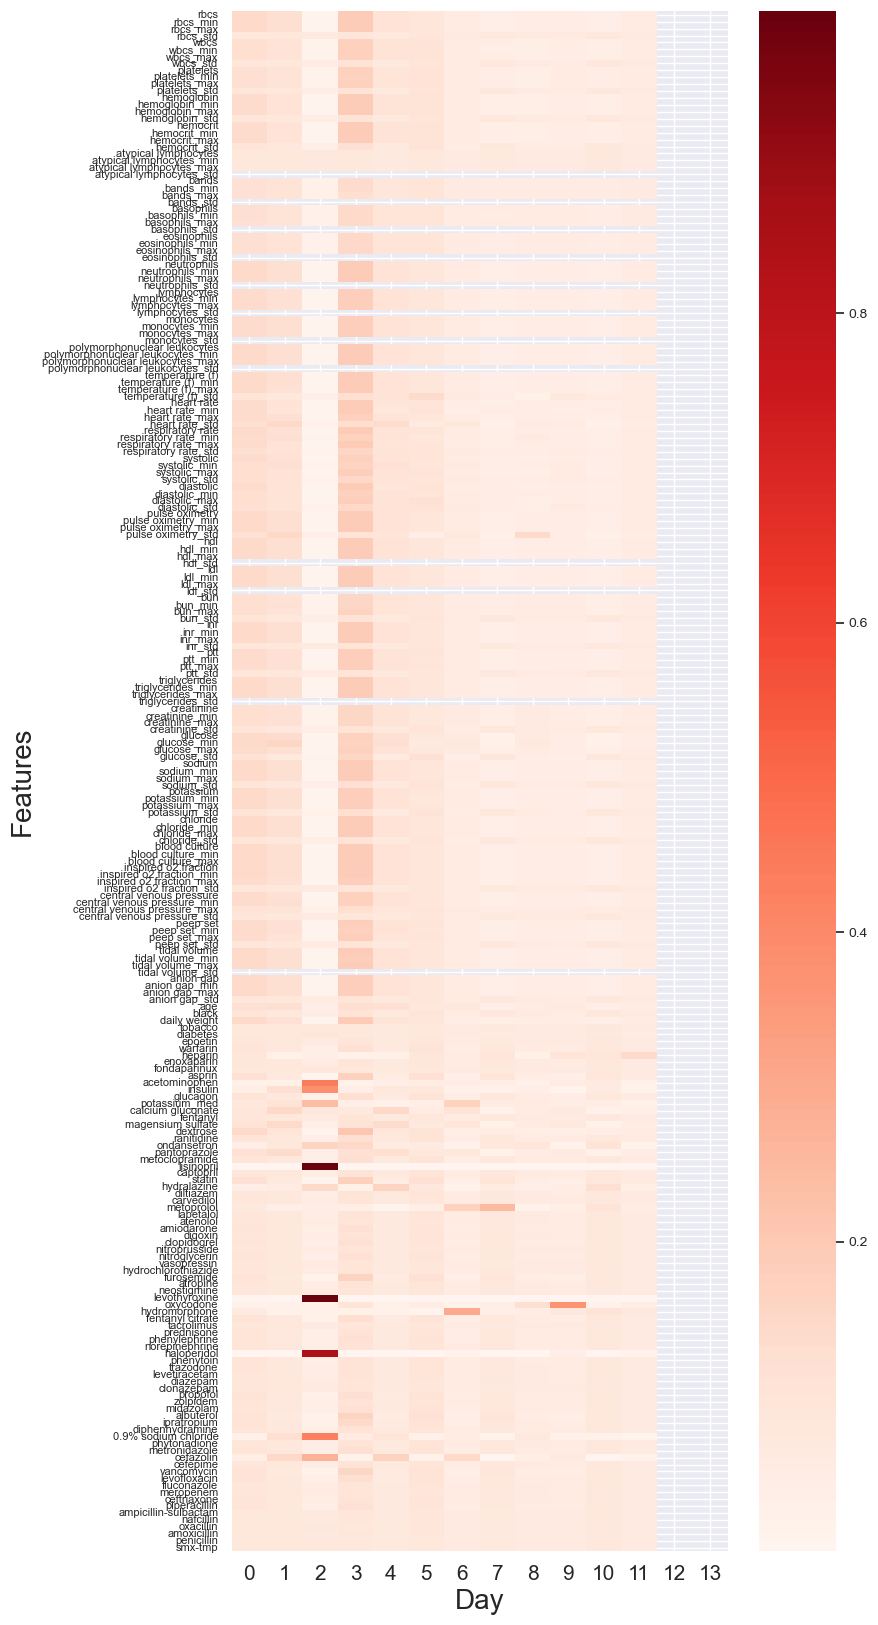

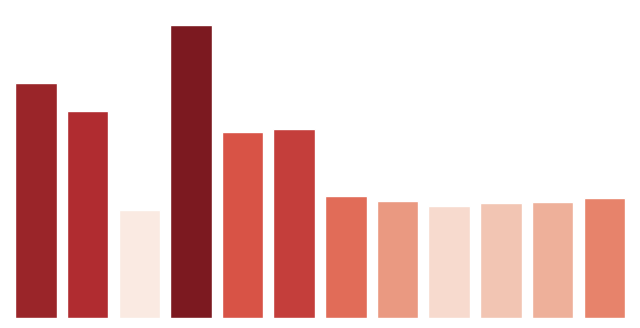

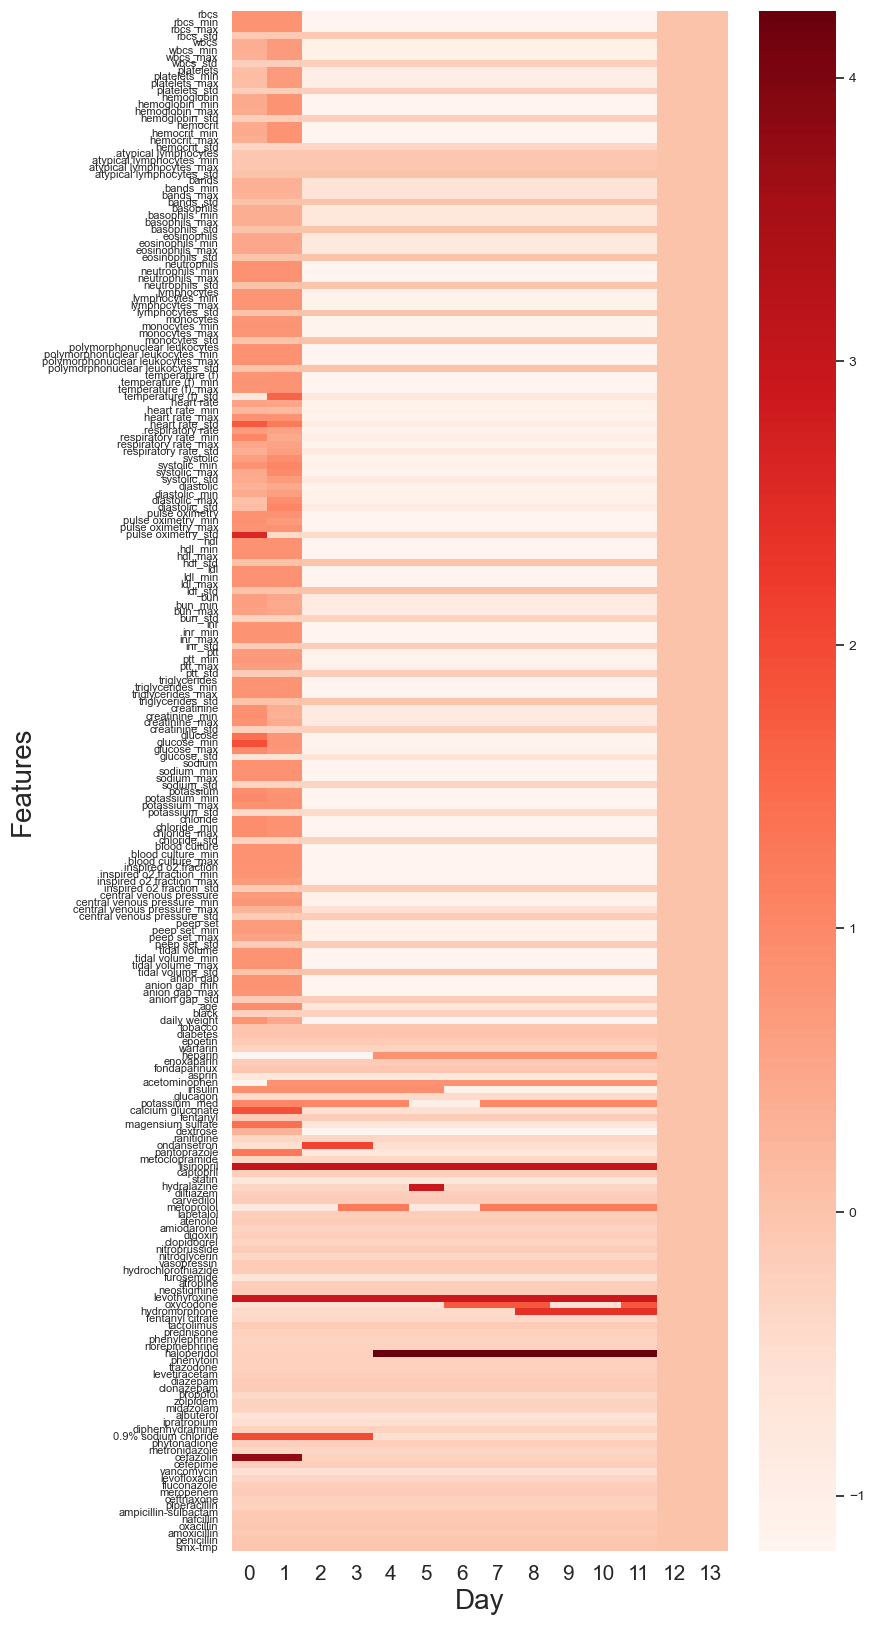

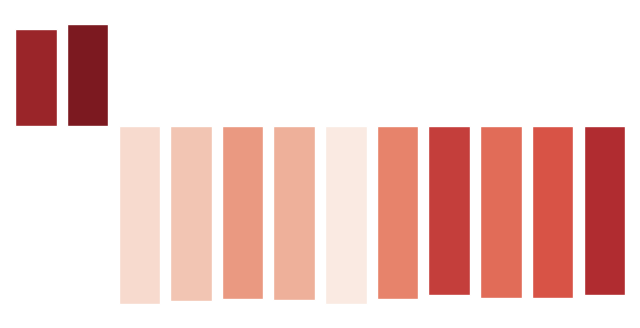

In [126]:
## Example use of patient_heatmap

patient_heatmap(patient_num, savefig=True, target=target)

In [136]:
## Get the top activations for that day, the day before, the day before ##
# def features_driving_incident(patient_num, savefig=False):
    
#     plt.figure(figsize = (8,4)) 
#     sns.set(style="white")
    
#     if np.where(Y_TEST[patient_num] == 1)[0][0] == 1:
#         day_zero = 1
#         day_neg_one = 0
#         days = np.array([day_neg_one, day_zero])
#         days_string = ['Day -1', 'Day 0']
#     else:
#         assert np.where(Y_TEST[patient_num] == 1)[0][0] >= 2
#         day_zero = np.where(Y_TEST[patient_num] == 1)[0][0]
#         day_neg_one = day_zero - 1
#         day_neg_two = day_zero - 2
#         days = np.array([day_neg_two, day_neg_one, day_zero])
#         days_string = ['Day -2', 'Day -1', 'Day 0']
        
#     y_vector = np.nanmax(activations[patient_num], axis=1) #[days]
#     print(y_vector)
#     print(np.nansum(y_vector))
#     color_rank = np.argsort(np.argsort(y_vector))
#     plot = sns.barplot(x=days_string, y=y_vector[days], 
#                        palette=np.array(color_list)[color_rank][days])
#     plt.ylabel('Feature Activation', fontsize=20)
#         #plot.set(xticklabels=[]) 
#         #plot.set(yticklabels=[])
#     sns.despine() # left=True, bottom=True)

#     if savefig:
#         plt.savefig('./figures/max_activation_pre_incident_barplot_Figure_4_{0}_patient_{1}.eps'.format(target, patient_num), 
#              format='eps', dpi=300, bbox_inches='tight')
                   
#     ## list of features by day that these activations correspond to ##

#     print(np.array(features)[np.nanargmax(activations[patient_num], axis=1)][days])
#     print(np.nanmax(activations[patient_num], axis=1)[days])
    
#####
    
# features_driving_incident(patient_num, savefig=True)
    
#####    

In [138]:
print(activations[patient_num].shape)

print(activations[patient_num].T[features.index('phenylephrine'),1])

#activations[patient_num][list(np.array(features)[arranged_indices]).index('levothyroxine'),0]

(14, 224)
0.07795431


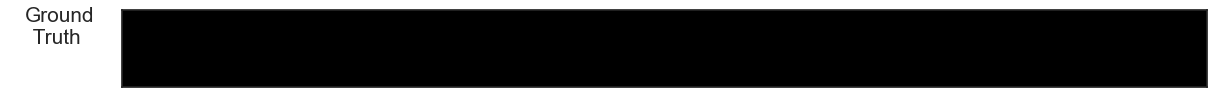

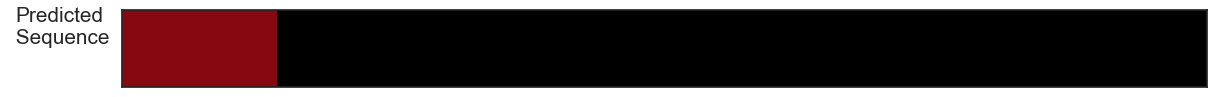

In [137]:
## FIGURE 4 ##

def predictions_labels_palplot(patient_num, savefig=False):
    
    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]       
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)
    
    if savefig:
        plt.savefig('./figures/{0}_GT_labels_Figure_4.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence', fontsize=15, rotation='horizontal', labelpad=45)
    if savefig:
        plt.savefig('./figures/{0}_PRED_labels_Figure_4.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), 
                    bbox_inches='tight')
    
predictions_labels_palplot(patient_num, savefig=True)